Welcome to my notebook! This is a copy/paste welcome message for all my notebooks :) 📓 This repository/notebook serves as a personal reminder for me, documenting code snippets and techniques sourced from various learning resources. The goal is to consolidate valuable information and create a basic reference guide. Please note that the codes included here are not originally mine, and credit goes to the respective authors and resources. Feel free to explore and use this collection as a shared learning space. Happy coding

#### Sources for this notebook : 
    * https://huggingface.co/docs/diffusers/using-diffusers/loading
    * https://huggingface.co/docs/diffusers/using-diffusers/schedulers
    
    
#### Purpose :
    * Loading SD pipeline by diffusers
    * Using different schedulers in SD
    
#### Keywords :
    * Stable diffusion 
    * Schedulers

## PART 1- DIFFUSION PIPELINES


The DiffusionPipeline.from_pretrained() method automatically detects the correct pipeline class from the checkpoint, downloads, and caches all the required configuration and weight files, and returns a pipeline instance ready for inference.

In [1]:
from diffusers import DiffusionPipeline

repo_id = "runwayml/stable-diffusion-v1-5"
pipe = DiffusionPipeline.from_pretrained(repo_id, use_safetensors=True)

C:\Users\Zeki\anaconda3\envs\stable_diff\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\Zeki\anaconda3\envs\stable_diff\lib\site-packages\diffusers\utils\outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
C:\Users\Zeki\anaconda3\envs\stable_diff\lib\site-packages\diffusers\utils\outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
Loading pipeline components...: 100%|██████████| 7/7 [00:01<00:00,  6.11it/s]


In [2]:
pipe

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.26.2",
  "_name_or_path": "runwayml/stable-diffusion-v1-5",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

#### checkpoint

A checkpoint (such as CompVis/stable-diffusion-v1-4 or runwayml/stable-diffusion-v1-5) may also be used for more than one task, like text-to-image or image-to-image. To differentiate what task you want to use the checkpoint for, you have to load it directly with its corresponding task-specific pipeline class:

In [3]:
from diffusers import StableDiffusionImg2ImgPipeline

repo_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(repo_id)

Loading pipeline components...: 100%|██████████| 7/7 [00:00<00:00, 10.78it/s]


In [4]:
pipe

StableDiffusionImg2ImgPipeline {
  "_class_name": "StableDiffusionImg2ImgPipeline",
  "_diffusers_version": "0.26.2",
  "_name_or_path": "runwayml/stable-diffusion-v1-5",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

You can load a checkpoint from local path. The from_pretrained() method won’t download any files from the Hub when it detects a local path

You can customize the default components of any pipeline with another compatible component. you can find compatible components like the command.
It is important for speed, finu-tuning and better performance for specific tasks

In [5]:
from diffusers import DiffusionPipeline

repo_id = "runwayml/stable-diffusion-v1-5"
stable_diffusion = DiffusionPipeline.from_pretrained(repo_id, use_safetensors=True)
stable_diffusion.scheduler.compatibles

Loading pipeline components...: 100%|██████████| 7/7 [00:00<00:00, 10.47it/s]


[diffusers.schedulers.scheduling_deis_multistep.DEISMultistepScheduler,
 diffusers.schedulers.scheduling_euler_discrete.EulerDiscreteScheduler,
 diffusers.schedulers.scheduling_dpmsolver_singlestep.DPMSolverSinglestepScheduler,
 diffusers.schedulers.scheduling_ddpm.DDPMScheduler,
 diffusers.schedulers.scheduling_pndm.PNDMScheduler,
 diffusers.schedulers.scheduling_lms_discrete.LMSDiscreteScheduler,
 diffusers.schedulers.scheduling_k_dpm_2_discrete.KDPM2DiscreteScheduler,
 diffusers.schedulers.scheduling_k_dpm_2_ancestral_discrete.KDPM2AncestralDiscreteScheduler,
 diffusers.schedulers.scheduling_ddim.DDIMScheduler,
 diffusers.schedulers.scheduling_euler_ancestral_discrete.EulerAncestralDiscreteScheduler,
 diffusers.schedulers.scheduling_unipc_multistep.UniPCMultistepScheduler,
 diffusers.schedulers.scheduling_heun_discrete.HeunDiscreteScheduler,
 diffusers.utils.dummy_torch_and_torchsde_objects.DPMSolverSDEScheduler,
 diffusers.schedulers.scheduling_dpmsolver_multistep.DPMSolverMultiste

#### scheduler

Lets change  default scheduler for our pipeline

In [6]:
from diffusers import DiffusionPipeline, EulerDiscreteScheduler

repo_id = "runwayml/stable-diffusion-v1-5"
scheduler = EulerDiscreteScheduler.from_pretrained(repo_id, subfolder="scheduler")
stable_diffusion = DiffusionPipeline.from_pretrained(repo_id, scheduler=scheduler, use_safetensors=True)

Loading pipeline components...: 100%|██████████| 7/7 [00:00<00:00, 10.35it/s]


In [7]:
stable_diffusion

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.26.2",
  "_name_or_path": "runwayml/stable-diffusion-v1-5",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "EulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

#### Safety Checker

Diffusion models like Stable Diffusion can generate harmful content. Safety checker is here to check generated outputs against known hardcoded NSFW content. You can unable it easily

In [8]:
from diffusers import DiffusionPipeline

repo_id = "runwayml/stable-diffusion-v1-5"
stable_diffusion = DiffusionPipeline.from_pretrained(repo_id, safety_checker=None, use_safetensors=True)


Loading pipeline components...: 100%|██████████| 6/6 [00:00<00:00, 13.54it/s]
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


In [9]:
stable_diffusion

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.26.2",
  "_name_or_path": "runwayml/stable-diffusion-v1-5",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

#### Reuse components across pipelines

You can also reuse the same components in multiple pipelines to avoid loading the weights into RAM twice.

In [10]:
from diffusers import StableDiffusionPipeline, StableDiffusionImg2ImgPipeline

model_id = "runwayml/stable-diffusion-v1-5"
stable_diffusion_txt2img = StableDiffusionPipeline.from_pretrained(model_id, use_safetensors=True)

components = stable_diffusion_txt2img.components

Loading pipeline components...: 100%|██████████| 7/7 [00:00<00:00,  9.37it/s]


In [11]:
components

{'vae': AutoencoderKL(
   (encoder): Encoder(
     (conv_in): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (down_blocks): ModuleList(
       (0): DownEncoderBlock2D(
         (resnets): ModuleList(
           (0-1): 2 x ResnetBlock2D(
             (norm1): GroupNorm(32, 128, eps=1e-06, affine=True)
             (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
             (norm2): GroupNorm(32, 128, eps=1e-06, affine=True)
             (dropout): Dropout(p=0.0, inplace=False)
             (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
             (nonlinearity): SiLU()
           )
         )
         (downsamplers): ModuleList(
           (0): Downsample2D(
             (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2))
           )
         )
       )
       (1): DownEncoderBlock2D(
         (resnets): ModuleList(
           (0): ResnetBlock2D(
             (norm1): GroupNorm(32, 128, eps=1e

In [12]:
stable_diffusion_img2img = StableDiffusionImg2ImgPipeline(**components)

In [13]:
stable_diffusion_img2img

StableDiffusionImg2ImgPipeline {
  "_class_name": "StableDiffusionImg2ImgPipeline",
  "_diffusers_version": "0.26.2",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

You can also pass the components individually to the pipeline if you want more flexibility over which components to reuse or disable.

In [ ]:
from diffusers import StableDiffusionPipeline, StableDiffusionImg2ImgPipeline

model_id = "runwayml/stable-diffusion-v1-5"
stable_diffusion_txt2img = StableDiffusionPipeline.from_pretrained(model_id, use_safetensors=True)
stable_diffusion_img2img = StableDiffusionImg2ImgPipeline(
    vae=stable_diffusion_txt2img.vae,
    text_encoder=stable_diffusion_txt2img.text_encoder,
    tokenizer=stable_diffusion_txt2img.tokenizer,
    unet=stable_diffusion_txt2img.unet,
    scheduler=stable_diffusion_txt2img.scheduler,
    safety_checker=None,
    feature_extractor=None,
    requires_safety_checker=False,
)

#### Models

Models are loaded from the ModelMixin.from_pretrained() method, which downloads and caches the latest version of the model weights and configurations

Models can be loaded from a subfolder with the subfolder argument. For example, the model weights for runwayml/stable-diffusion-v1-5 are stored in the unet subfolder:.

In [ ]:
from diffusers import UNet2DConditionModel

repo_id = "runwayml/stable-diffusion-v1-5"
model = UNet2DConditionModel.from_pretrained(repo_id, subfolder="unet", use_safetensors=True)

Or directly from a repository’s directory:

In [ ]:
from diffusers import UNet2DModel

repo_id = "google/ddpm-cifar10-32"
model = UNet2DModel.from_pretrained(repo_id, use_safetensors=True)

### Schedulers

Schedulers are loaded from the SchedulerMixin.from_pretrained() method, and unlike models, schedulers are not parameterized or trained; they are defined by a configuration file.

Loading schedulers does not consume any significant amount of memory and the same configuration file can be used for a variety of different schedulers.

In [ ]:
from diffusers import StableDiffusionPipeline
from diffusers import (
    DDPMScheduler,
    DDIMScheduler,
    PNDMScheduler,
    LMSDiscreteScheduler,
    EulerAncestralDiscreteScheduler,
    EulerDiscreteScheduler,
    DPMSolverMultistepScheduler,
)

repo_id = "runwayml/stable-diffusion-v1-5"

ddpm = DDPMScheduler.from_pretrained(repo_id, subfolder="scheduler")
ddim = DDIMScheduler.from_pretrained(repo_id, subfolder="scheduler")
pndm = PNDMScheduler.from_pretrained(repo_id, subfolder="scheduler")
lms = LMSDiscreteScheduler.from_pretrained(repo_id, subfolder="scheduler")
euler_anc = EulerAncestralDiscreteScheduler.from_pretrained(repo_id, subfolder="scheduler")
euler = EulerDiscreteScheduler.from_pretrained(repo_id, subfolder="scheduler")
dpm = DPMSolverMultistepScheduler.from_pretrained(repo_id, subfolder="scheduler")

# replace `dpm` with any of `ddpm`, `ddim`, `pndm`, `lms`, `euler_anc`, `euler`
pipeline = StableDiffusionPipeline.from_pretrained(repo_id, scheduler=dpm, use_safetensors=True)

some details from models components

In [15]:
pipe.tokenizer

CLIPTokenizer(name_or_path='C:\Users\Zeki\.cache\huggingface\hub\models--runwayml--stable-diffusion-v1-5\snapshots\1d0c4ebf6ff58a5caecab40fa1406526bca4b5b9\tokenizer', vocab_size=49408, model_max_length=77, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<|startoftext|>', 'eos_token': '<|endoftext|>', 'unk_token': '<|endoftext|>', 'pad_token': '<|endoftext|>'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	49406: AddedToken("<|startoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	49407: AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
}

## PART 2-SCHEDULERS

SCHEDULER

Diffusion pipelines are inherently a collection of diffusion models and schedulers that are partly independent from each other. This means that one is able to switch out parts of the pipeline to better customize a pipeline to one’s use case.

They can be quite complex and often define a trade-off between denoising speed and denoising quality. It is extremely difficult to measure quantitatively which scheduler works best for a given diffusion pipeline, so it is often recommended to simply try out which works best.

In [16]:

from diffusers import DiffusionPipeline
import torch

pipeline = DiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16, use_safetensors=True)

Loading pipeline components...: 100%|██████████| 7/7 [00:08<00:00,  1.21s/it]


In [17]:
pipeline.to("cuda")

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.26.2",
  "_name_or_path": "runwayml/stable-diffusion-v1-5",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [18]:
pipeline.scheduler

PNDMScheduler {
  "_class_name": "PNDMScheduler",
  "_diffusers_version": "0.26.2",
  "beta_end": 0.012,
  "beta_schedule": "scaled_linear",
  "beta_start": 0.00085,
  "clip_sample": false,
  "num_train_timesteps": 1000,
  "prediction_type": "epsilon",
  "set_alpha_to_one": false,
  "skip_prk_steps": true,
  "steps_offset": 1,
  "timestep_spacing": "leading",
  "trained_betas": null
}

In [19]:
prompt = "A photograph of an astronaut riding a horse on Mars, high resolution, high definition."

  0%|          | 0/50 [00:00<?, ?it/s]C:\Users\Zeki\anaconda3\envs\stable_diff\lib\site-packages\diffusers\models\attention_processor.py:1244: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:263.)
  hidden_states = F.scaled_dot_product_attention(
100%|██████████| 50/50 [00:09<00:00,  5.22it/s]


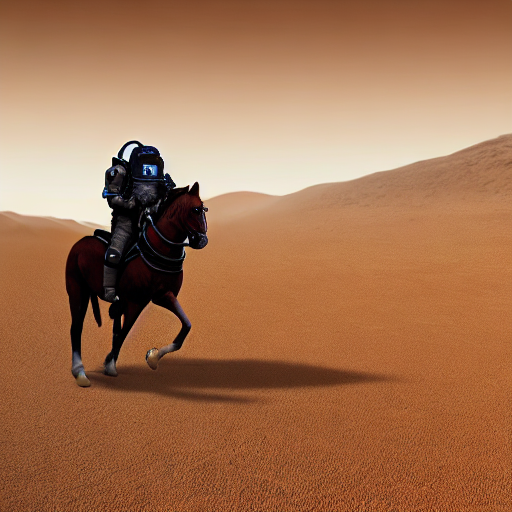

In [20]:
generator = torch.Generator(device="cuda").manual_seed(8)
image = pipeline(prompt, generator=generator).images[0]
image

Now we show how easy it is to change the scheduler of a pipeline. Every scheduler has a property compatibles which defines all compatible schedulers. You can take a look at all available, compatible schedulers for the Stable Diffusion pipeline

In [21]:
pipeline.scheduler.compatibles

[diffusers.schedulers.scheduling_deis_multistep.DEISMultistepScheduler,
 diffusers.schedulers.scheduling_euler_discrete.EulerDiscreteScheduler,
 diffusers.schedulers.scheduling_dpmsolver_singlestep.DPMSolverSinglestepScheduler,
 diffusers.schedulers.scheduling_ddpm.DDPMScheduler,
 diffusers.schedulers.scheduling_pndm.PNDMScheduler,
 diffusers.schedulers.scheduling_lms_discrete.LMSDiscreteScheduler,
 diffusers.schedulers.scheduling_k_dpm_2_discrete.KDPM2DiscreteScheduler,
 diffusers.schedulers.scheduling_k_dpm_2_ancestral_discrete.KDPM2AncestralDiscreteScheduler,
 diffusers.schedulers.scheduling_ddim.DDIMScheduler,
 diffusers.schedulers.scheduling_euler_ancestral_discrete.EulerAncestralDiscreteScheduler,
 diffusers.schedulers.scheduling_unipc_multistep.UniPCMultistepScheduler,
 diffusers.schedulers.scheduling_heun_discrete.HeunDiscreteScheduler,
 diffusers.utils.dummy_torch_and_torchsde_objects.DPMSolverSDEScheduler,
 diffusers.schedulers.scheduling_dpmsolver_multistep.DPMSolverMultiste

In [22]:
pipeline.scheduler.config

FrozenDict([('num_train_timesteps', 1000),
            ('beta_start', 0.00085),
            ('beta_end', 0.012),
            ('beta_schedule', 'scaled_linear'),
            ('trained_betas', None),
            ('skip_prk_steps', True),
            ('set_alpha_to_one', False),
            ('prediction_type', 'epsilon'),
            ('timestep_spacing', 'leading'),
            ('steps_offset', 1),
            ('_use_default_values', ['prediction_type', 'timestep_spacing']),
            ('_class_name', 'PNDMScheduler'),
            ('_diffusers_version', '0.26.2'),
            ('clip_sample', False)])

In [23]:
from diffusers import DDIMScheduler

pipeline.scheduler = DDIMScheduler.from_config(pipeline.scheduler.config)

In [24]:
pipeline

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.26.2",
  "_name_or_path": "runwayml/stable-diffusion-v1-5",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "DDIMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

100%|██████████| 50/50 [00:08<00:00,  5.96it/s]


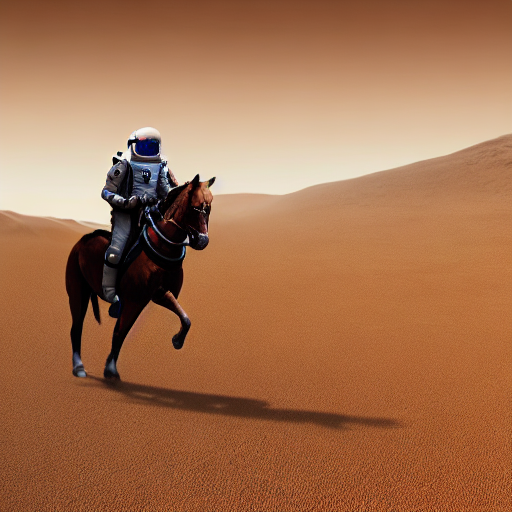

In [25]:
generator = torch.Generator(device="cuda").manual_seed(8)
image = pipeline(prompt, generator=generator).images[0]
image

100%|██████████| 50/50 [00:07<00:00,  6.58it/s]


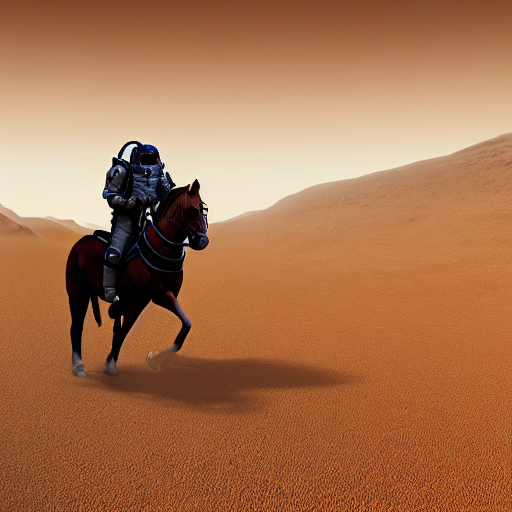

In [26]:
from diffusers import LMSDiscreteScheduler

pipeline.scheduler = LMSDiscreteScheduler.from_config(pipeline.scheduler.config)

generator = torch.Generator(device="cuda").manual_seed(8)
image = pipeline(prompt, generator=generator).images[0]
image

EulerDiscreteScheduler and EulerAncestralDiscreteScheduler can generate high quality results with as little as 30 steps.

100%|██████████| 30/30 [00:04<00:00,  6.82it/s]


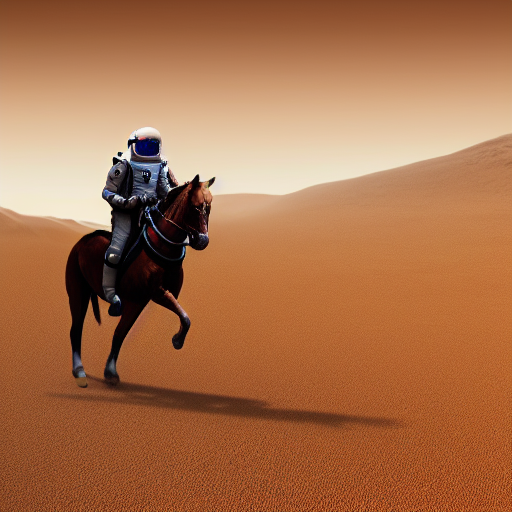

In [27]:
from diffusers import EulerDiscreteScheduler

pipeline.scheduler = EulerDiscreteScheduler.from_config(pipeline.scheduler.config)

generator = torch.Generator(device="cuda").manual_seed(8)
image = pipeline(prompt, generator=generator, num_inference_steps=30).images[0]
image

100%|██████████| 30/30 [00:04<00:00,  6.82it/s]


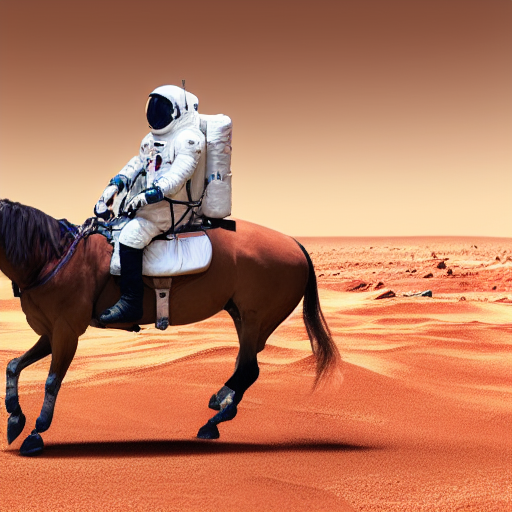

In [28]:
from diffusers import EulerAncestralDiscreteScheduler

pipeline.scheduler = EulerAncestralDiscreteScheduler.from_config(pipeline.scheduler.config)

generator = torch.Generator(device="cuda").manual_seed(8)
image = pipeline(prompt, generator=generator, num_inference_steps=30).images[0]
image

DPMSolverMultistepScheduler gives a reasonable speed/quality trade-off and can be run with as little as 20 steps.

100%|██████████| 20/20 [00:02<00:00,  7.08it/s]


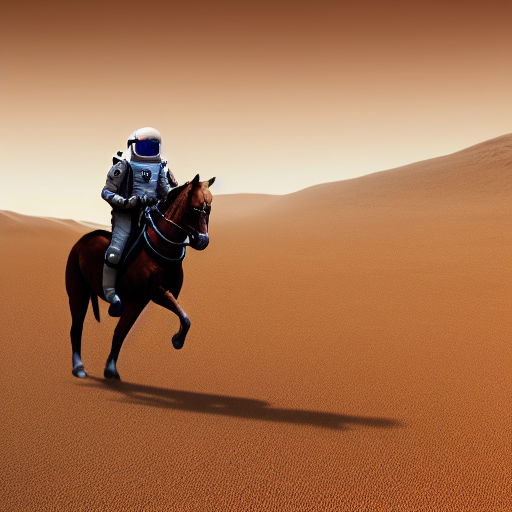

In [29]:
from diffusers import DPMSolverMultistepScheduler

pipeline.scheduler = DPMSolverMultistepScheduler.from_config(pipeline.scheduler.config)

generator = torch.Generator(device="cuda").manual_seed(8)
image = pipeline(prompt, generator=generator, num_inference_steps=20).images[0]
image